# **Install libraries**

In [69]:
pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [70]:
!pip install graphframes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
from pyspark.sql import SparkSession
from graphframes import GraphFrame

In [71]:
spark = SparkSession.builder.master("local[*]").config("spark.jars.packages", "graphframes:graphframes:0.8.2-spark3.2-s_2.12").getOrCreate()

### **This Is Gragh**

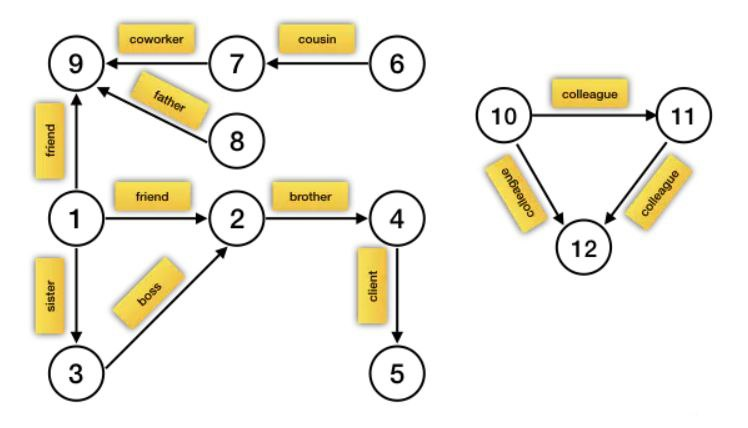

### **Enter DataSet**

In [72]:
vertices = spark.createDataFrame([
  ("4","Dave","25"),
  ("6","Faith","21"),
  ("8","Harvey","47"),
  ("2","Bob","18"),
  ("1","Alice","20"),
  ("3","Charlie","30"),
  ("7","George","34"),
  ("9","Ivy","21"),
  ("5","Eve","30"),
  ("10","Lily","35"),
  ("11","Helen","35"),
  ("12","Ann","35")],
  ["id", "name", "age"]
)
edges = spark.createDataFrame([
  ("1","2","friend"),
  ("1","3","sister"),
  ("2","4","brother"),
  ("3","2","boss"),
  ("4","5","client"),
  ("1","9","friend"),
  ("6","7","cousin"),
  ("7","9","coworker"),
  ("8","9","father"),
  ("10","11","colleague"),
  ("10","12","colleague"),
  ("11","12","colleague")],
  ["src", "dst", "relation"]
)

g = GraphFrame(vertices, edges)

/usr/local/lib/python3.8/dist-packages/pyspark/sql/dataframe.py:148: UserWarning: DataFrame.sql_ctx is an internal property, and will be removed in future releases. Use DataFrame.sparkSession instead.
  warnings.warn(


### **Show Nodes**

In [73]:
g.vertices.show()

+---+-------+---+
| id|   name|age|
+---+-------+---+
|  4|   Dave| 25|
|  6|  Faith| 21|
|  8| Harvey| 47|
|  2|    Bob| 18|
|  1|  Alice| 20|
|  3|Charlie| 30|
|  7| George| 34|
|  9|    Ivy| 21|
|  5|    Eve| 30|
| 10|   Lily| 35|
| 11|  Helen| 35|
| 12|    Ann| 35|
+---+-------+---+




### *InDegree: "This means number of edges included in the node*"

In [74]:
g.inDegrees
g.inDegrees.show()

+---+--------+
| id|inDegree|
+---+--------+
|  3|       1|
|  5|       1|
|  9|       3|
|  4|       1|
|  2|       2|
|  7|       1|
| 11|       1|
| 12|       2|
+---+--------+



### OutDegree: "This means number of edges out of node" 

In [75]:
g.outDegrees 
g.outDegrees.show()

+---+---------+
| id|outDegree|
+---+---------+
|  3|        1|
|  1|        3|
|  4|        1|
|  2|        1|
|  7|        1|
| 11|        1|
|  8|        1|
|  6|        1|
| 10|        2|
+---+---------+



In [76]:
indeg=g.inDegrees
outdeg=g.outDegrees

### **Make Filter**

In [77]:
indeg.filter('inDegree=2').show()
outdeg.filter('outDegree=1').show()

+---+--------+
| id|inDegree|
+---+--------+
|  2|       2|
| 12|       2|
+---+--------+

+---+---------+
| id|outDegree|
+---+---------+
|  3|        1|
|  4|        1|
|  2|        1|
|  7|        1|
| 11|        1|
|  8|        1|
|  6|        1|
+---+---------+



In [78]:
g.vertices.select('id','age').where('age>20').show()

+---+---+
| id|age|
+---+---+
|  4| 25|
|  6| 21|
|  8| 47|
|  3| 30|
|  7| 34|
|  9| 21|
|  5| 30|
| 10| 35|
| 11| 35|
| 12| 35|
+---+---+



In [79]:
m = g.find('(v1)-[e1]->(v2)')

In [80]:
m.printSchema()

root
 |-- v1: struct (nullable = false)
 |    |-- id: string (nullable = true)
 |    |-- name: string (nullable = true)
 |    |-- age: string (nullable = true)
 |-- e1: struct (nullable = false)
 |    |-- src: string (nullable = true)
 |    |-- dst: string (nullable = true)
 |    |-- relation: string (nullable = true)
 |-- v2: struct (nullable = false)
 |    |-- id: string (nullable = true)
 |    |-- name: string (nullable = true)
 |    |-- age: string (nullable = true)



In [81]:
m.show(truncate=False)

+----------------+-------------------+----------------+
|v1              |e1                 |v2              |
+----------------+-------------------+----------------+
|{1, Alice, 20}  |{1, 3, sister}     |{3, Charlie, 30}|
|{2, Bob, 18}    |{2, 4, brother}    |{4, Dave, 25}   |
|{3, Charlie, 30}|{3, 2, boss}       |{2, Bob, 18}    |
|{1, Alice, 20}  |{1, 2, friend}     |{2, Bob, 18}    |
|{6, Faith, 21}  |{6, 7, cousin}     |{7, George, 34} |
|{10, Lily, 35}  |{10, 11, colleague}|{11, Helen, 35} |
|{4, Dave, 25}   |{4, 5, client}     |{5, Eve, 30}    |
|{8, Harvey, 47} |{8, 9, father}     |{9, Ivy, 21}    |
|{7, George, 34} |{7, 9, coworker}   |{9, Ivy, 21}    |
|{1, Alice, 20}  |{1, 9, friend}     |{9, Ivy, 21}    |
|{11, Helen, 35} |{11, 12, colleague}|{12, Ann, 35}   |
|{10, Lily, 35}  |{10, 12, colleague}|{12, Ann, 35}   |
+----------------+-------------------+----------------+



In [82]:
g.vertices.show()

+---+-------+---+
| id|   name|age|
+---+-------+---+
|  4|   Dave| 25|
|  6|  Faith| 21|
|  8| Harvey| 47|
|  2|    Bob| 18|
|  1|  Alice| 20|
|  3|Charlie| 30|
|  7| George| 34|
|  9|    Ivy| 21|
|  5|    Eve| 30|
| 10|   Lily| 35|
| 11|  Helen| 35|
| 12|    Ann| 35|
+---+-------+---+



In [83]:
g.edges.show()

+---+---+---------+
|src|dst| relation|
+---+---+---------+
|  1|  2|   friend|
|  1|  3|   sister|
|  2|  4|  brother|
|  3|  2|     boss|
|  4|  5|   client|
|  1|  9|   friend|
|  6|  7|   cousin|
|  7|  9| coworker|
|  8|  9|   father|
| 10| 11|colleague|
| 10| 12|colleague|
| 11| 12|colleague|
+---+---+---------+



## **Select a specific item from Table**

In [84]:
g1= g.filterEdges('relation = "colleague"')
g1.vertices.show()
g1.edges.show()

+---+-------+---+
| id|   name|age|
+---+-------+---+
|  4|   Dave| 25|
|  6|  Faith| 21|
|  8| Harvey| 47|
|  2|    Bob| 18|
|  1|  Alice| 20|
|  3|Charlie| 30|
|  7| George| 34|
|  9|    Ivy| 21|
|  5|    Eve| 30|
| 10|   Lily| 35|
| 11|  Helen| 35|
| 12|    Ann| 35|
+---+-------+---+

+---+---+---------+
|src|dst| relation|
+---+---+---------+
| 10| 11|colleague|
| 10| 12|colleague|
| 11| 12|colleague|
+---+---+---------+



### **dropIsolatedVertices delete vetices that have no edges**

In [85]:
g2= g1.dropIsolatedVertices()
g2.vertices.show()
g2.edges.show()

+---+-----+---+
| id| name|age|
+---+-----+---+
| 10| Lily| 35|
| 11|Helen| 35|
| 12|  Ann| 35|
+---+-----+---+

+---+---+---------+
|src|dst| relation|
+---+---+---------+
| 10| 11|colleague|
| 10| 12|colleague|
| 11| 12|colleague|
+---+---+---------+



## **Run PageRank algorithm, and show results.**

In [94]:
# Run PageRank until convergence to tolerance "tol".
results = g.pageRank(resetProbability=0.15, tol=0.01)
# Display resulting pageranks and final edge weights
# Note that the displayed pagerank may be truncated, e.g., missing the E notation.
# In Spark 1.5+, you can use show(truncate=False) to avoid truncation.
results.vertices.select("id", "pagerank").show()
results.edges.select("src", "dst", "weight").show()

# Run PageRank for a fixed number of iterations.
results2 = g.pageRank(resetProbability=0.15, maxIter=10)

# Run PageRank personalized for vertex "a"
results3 = g.pageRank(resetProbability=0.15, maxIter=10, sourceId="1")

# Run PageRank personalized for vertex ["a", "b", "c", "d"] in parallel
results4 = g.parallelPersonalizedPageRank(resetProbability=0.15, sourceIds=["1", "2", "3", "4"], maxIter=10)

+---+------------------+
| id|          pagerank|
+---+------------------+
|  7|0.9305070346454071|
| 11|0.7167419050647055|
|  3|0.6454868618711384|
|  8|0.5029767754840039|
|  5|1.7932809113939172|
|  6|0.5029767754840039|
|  9|1.8639481004811378|
|  1|0.5029767754840039|
| 10|0.5029767754840039|
|  4|1.5180048657763685|
| 12|1.3259725243697051|
|  2|1.1941506944616058|
+---+------------------+

+---+---+------------------+
|src|dst|            weight|
+---+---+------------------+
|  7|  9|               1.0|
| 11| 12|               1.0|
|  3|  2|               1.0|
|  8|  9|               1.0|
|  6|  7|               1.0|
|  1|  3|0.3333333333333333|
|  1|  9|0.3333333333333333|
|  1|  2|0.3333333333333333|
| 10| 11|               0.5|
| 10| 12|               0.5|
|  4|  5|               1.0|
|  2|  4|               1.0|
+---+---+------------------+



In [87]:
motifs = g.find('(v1)-[e1]->(v2)')
motifs.show()

+----------------+-------------------+----------------+
|              v1|                 e1|              v2|
+----------------+-------------------+----------------+
|  {1, Alice, 20}|     {1, 3, sister}|{3, Charlie, 30}|
|    {2, Bob, 18}|    {2, 4, brother}|   {4, Dave, 25}|
|{3, Charlie, 30}|       {3, 2, boss}|    {2, Bob, 18}|
|  {1, Alice, 20}|     {1, 2, friend}|    {2, Bob, 18}|
|  {6, Faith, 21}|     {6, 7, cousin}| {7, George, 34}|
|  {10, Lily, 35}|{10, 11, colleague}| {11, Helen, 35}|
|   {4, Dave, 25}|     {4, 5, client}|    {5, Eve, 30}|
| {8, Harvey, 47}|     {8, 9, father}|    {9, Ivy, 21}|
| {7, George, 34}|   {7, 9, coworker}|    {9, Ivy, 21}|
|  {1, Alice, 20}|     {1, 9, friend}|    {9, Ivy, 21}|
| {11, Helen, 35}|{11, 12, colleague}|   {12, Ann, 35}|
|  {10, Lily, 35}|{10, 12, colleague}|   {12, Ann, 35}|
+----------------+-------------------+----------------+



## **LPA is a standard community detection algorithm for graphs. It is very inexpensive computationally, although (1) convergence is not guaranteed and (2) one can end up with trivial solutions **

In [89]:
result = g.labelPropagation(maxIter=4)
result.select("id", "name").show()

+---+-------+
| id|   name|
+---+-------+
|  7| George|
| 11|  Helen|
|  3|Charlie|
|  8| Harvey|
|  5|    Eve|
|  6|  Faith|
|  9|    Ivy|
|  1|  Alice|
| 10|   Lily|
|  4|   Dave|
| 12|    Ann|
|  2|    Bob|
+---+-------+



In [96]:
results = g.triangleCount()
results.select("id", "count").show()

+---+-----+
| id|count|
+---+-----+
|  3|    1|
|  8|    0|
|  6|    0|
|  1|    1|
|  4|    0|
|  2|    1|
|  7|    0|
| 11|    1|
|  5|    0|
|  9|    0|
| 10|    1|
| 12|    1|
+---+-----+

